In [26]:
from sportsreference.nfl.schedule import Schedule
from sportsreference.nfl.boxscore import Boxscore
from sportsreference.nfl.roster   import Roster
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

relevent_stats =['completed_passes', 'attempted_passes', 'passing_yards',
                'passing_touchdowns', 'interceptions_thrown', 'times_sacked',
                'yards_lost_from_sacks', 'longest_pass', 'quarterback_rating',
                'rush_attempts', 'rush_yards', 'rush_touchdowns', 'longest_rush',
                'fumbles', 'fumbles_lost']

blank_dataframe = pd.DataFrame(columns = relevent_stats)
brady_stats, replacements_stats = blank_dataframe, blank_dataframe 

brady_wins, brady_losses = 0, 0
replacements_wins, replacements_losses = 0, 0

for year in range(2001,2020):
    print (f'{year} Season Patriots Quarterbacks:')
    
    pats_schedule = Schedule('NWE',year)
    pats_roster = Roster('NWE', year)
    pats_players = [x.name for x in pats_roster.players]

    for week,game in enumerate(pats_schedule,1):
        game_data = Boxscore(game.boxscore_index)

        if game.boxscore_index.endswith('nwe'):
            players = game_data.home_players
        else:
            players = game_data.away_players

        max_passes = 0
        for player in players:
            if (player.attempted_passes != None) & (player.name in pats_players):
                if player.attempted_passes > max_passes:
                    pats_qb = player
                    max_passes = player.attempted_passes
        
        qb_stats = pats_qb.dataframe[relevent_stats]
        qb_stats = qb_stats.fillna(value=0)

        qb_stats['boxscore_index'] =               game.boxscore_index
        qb_stats['completion_percentage'] =       (qb_stats.completed_passes     / qb_stats.attempted_passes)*100
        qb_stats['passing_yards_per_attempt'] =    qb_stats.passing_yards        / qb_stats.attempted_passes
        qb_stats['passing_yards_per_completion'] = qb_stats.passing_yards        / qb_stats.completed_passes
        qb_stats['passing_TDs_per_attempt'] =      qb_stats.passing_touchdowns   / qb_stats.attempted_passes
        qb_stats['passing_TDs_per_completion'] =   qb_stats.passing_touchdowns   / qb_stats.completed_passes
        qb_stats['interceptions_per_attempt'] =    qb_stats.interceptions_thrown / qb_stats.attempted_passes
        qb_stats['interceptions_per_completion'] = qb_stats.interceptions_thrown / qb_stats.completed_passes
        qb_stats['times_sacked_per_attempt'] =     qb_stats.times_sacked         / qb_stats.attempted_passes
        qb_stats['fumbles_per_attempt'] =          qb_stats.fumbles              / qb_stats.attempted_passes
        qb_stats['fumbles_lost_per_attempt'] =     qb_stats.fumbles_lost         / qb_stats.attempted_passes
        
        if pats_qb.name == 'Tom Brady':
            brady_stats = brady_stats.append(qb_stats)
            if game.result == 'Win':
                brady_wins +=1
            else:
                brady_losses +=1
        else:
            replacements_stats = replacements_stats.append(qb_stats)
            if game.result == 'Win':
                replacements_wins +=1
            else:
                replacements_losses +=1

        print(f'Week {week}: {pats_qb.name}')

print(f"Brady's Record: {brady_wins}-{brady_losses}")
print(f"Replacements' Record: {replacements_wins}-{replacements_losses}")

2001 Season Patriots Quarterbacks:
Week 1: Drew Bledsoe
Week 2: Drew Bledsoe
Week 3: Tom Brady
Week 4: Tom Brady
Week 5: Tom Brady
Week 6: Tom Brady
Week 7: Tom Brady
Week 8: Tom Brady
Week 9: Tom Brady
Week 10: Tom Brady
Week 11: Tom Brady
Week 12: Tom Brady
Week 13: Tom Brady
Week 14: Tom Brady
Week 15: Tom Brady
Week 16: Tom Brady
Week 17: Tom Brady
Week 18: Drew Bledsoe
Week 19: Tom Brady
2002 Season Patriots Quarterbacks:
Week 1: Tom Brady
Week 2: Tom Brady
Week 3: Tom Brady
Week 4: Tom Brady
Week 5: Tom Brady
Week 6: Tom Brady
Week 7: Tom Brady
Week 8: Tom Brady
Week 9: Tom Brady
Week 10: Tom Brady
Week 11: Tom Brady
Week 12: Tom Brady
Week 13: Tom Brady
Week 14: Tom Brady
Week 15: Tom Brady
Week 16: Tom Brady
2003 Season Patriots Quarterbacks:
Week 1: Tom Brady
Week 2: Tom Brady
Week 3: Tom Brady
Week 4: Tom Brady
Week 5: Tom Brady
Week 6: Tom Brady
Week 7: Tom Brady
Week 8: Tom Brady
Week 9: Tom Brady
Week 10: Tom Brady
Week 11: Tom Brady
Week 12: Tom Brady
Week 13: Tom Brady
W

In [28]:
brady_stats.to_csv('brady.csv')
replacements_stats.to_csv('replacements.csv')

In [31]:
def plot_histogram(stat):
    t_score, p_value = ttest_ind(brady_stats[stat], replacements_stats[stat])
    
    all_stats = brady_stats[stat].append(replacements_stats[stat])
    min_val, max_val = min(all_stats), max(all_stats)
    
    plt.hist(x=brady_stats[stat], bins=8, color='c', edgecolor='c', alpha=0.3, density=True, range = (min_val,max_val), label ='Brady', histtype='stepfilled')
    plt.axvline(brady_stats[stat].mean(), color='c', linestyle='dashed', linewidth=3, label = "Brady Average")
    plt.hist(x=replacements_stats[stat], bins=8, color='m', edgecolor='k', alpha=0.3, density=True, range = (min_val,max_val), label = 'Replacements', histtype='stepfilled')
    plt.axvline(replacements_stats[stat].mean(), color='m', linestyle='dashed', linewidth=3, label = "Replacements Average")
    plt.xlabel(f'{stat.replace("_", " ").title()}')
    plt.ylabel('Frequency')
    plt.title(f'{stat.replace("_", " ").title()} p={p_value:.5f}')
    plt.legend()

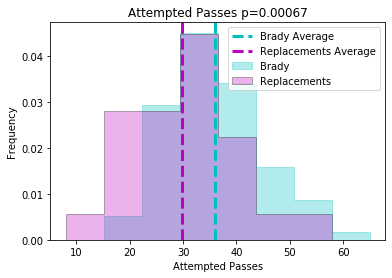

In [38]:
plot_histogram('attempted_passes')
plt.savefig('brady_vs_replacements_1.jpg', dpi=200)

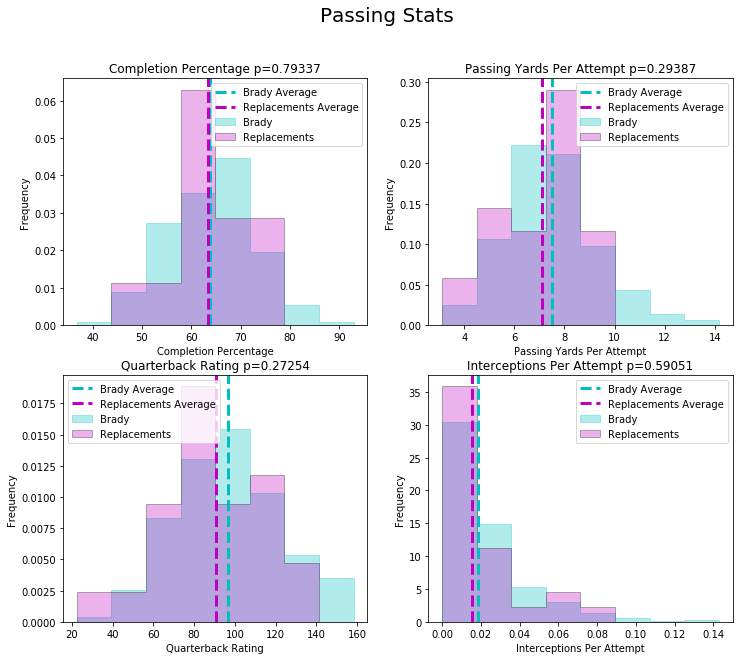

In [39]:
fig, x = plt.subplots(2,2,figsize=(12,10))
plt.suptitle("Passing Stats",fontsize=20)


plt.subplot(2, 2, 1)
plot_histogram('completion_percentage')
plt.subplot(2, 2, 2)
plot_histogram('passing_yards_per_attempt')
plt.subplot(2, 2, 3)
plot_histogram('quarterback_rating')
plt.subplot(2, 2, 4)
plot_histogram('interceptions_per_attempt')
plt.savefig('brady_vs_replacements_2.jpg', dpi=200)

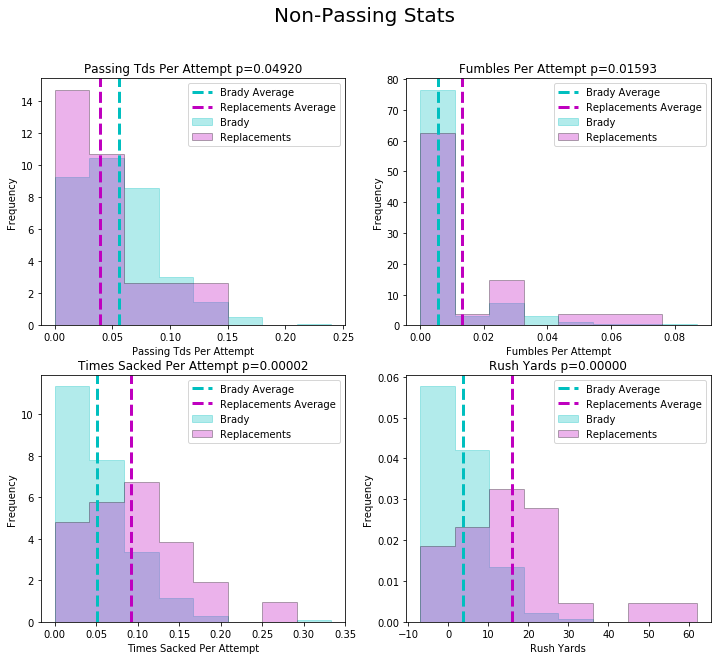

In [40]:
fig, x = plt.subplots(2,2,figsize=(12,10))
plt.suptitle("Non-Passing Stats",fontsize=20)


plt.subplot(2, 2, 1)
plot_histogram('passing_TDs_per_attempt')
plt.subplot(2, 2, 2)
plot_histogram('fumbles_per_attempt')
plt.subplot(2, 2, 3)
plot_histogram('times_sacked_per_attempt')
plt.subplot(2, 2, 4)
plot_histogram('rush_yards')
plt.savefig('brady_vs_replacements_3.jpg', dpi=200)